# 21 Sklearn Supervised Learning

In [1]:
import matplotlib
matplotlib.use('agg')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
from sklearn import datasets

In [4]:
np.random.seed(0)

In [5]:
boston = datasets.load_boston()

In [6]:
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

The 6th feature is the number of rooms.

In [8]:
X = boston.data[:, 5:6]
y = boston.target

Plotting rooms and prices, along with a guess.

Text(0,0.5,'median Value ($1000)')

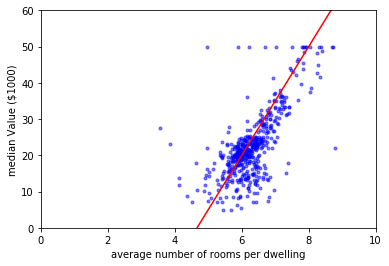

In [9]:
a = 15.; b = -70.
lx = np.arange(4, 10)
lguess = a * lx + b

plt.plot(lx, lguess, c='red')
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('median Value ($1000)')

## Ordinary Least Squares

In [10]:
import sklearn.linear_model as lm
lr = lm.LinearRegression() 
lr.fit(X, y)

/Users/tir/.virtualenvs/mlpy/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The `score` of linear regression is the R^2 score - how much does the model explain the data (the closer to 1, the better).

In [11]:
lr.score(X, y)

0.4835254559913343

In [12]:
y_pred = lr.predict(X)

In [13]:
y_pred.shape

(506,)

Text(0,0.5,'median Value ($1000)')

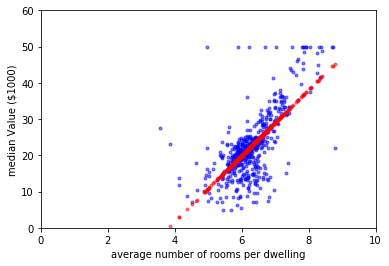

In [14]:
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('median Value ($1000)')

## Stoachastic Gradient Descent

Stoachastic Gradient Descent is a general purpose optimization algorithm. The algorithm starts with random values for the parameters. The goal is to find a set of parameters, which result in a low loss. It is an iterative algorithm, that adjust the weights by a product of a learning rate (step size) and the gradient of the loss function.

Problems can arise, if the learning rate is too low or too high. A too low learning rate slows the process down, a high learning rate might let the algorithm overshoot. Some algorithm work with fixed learning rates. Many approaches have been proposed, that adjust the learning rate during optimization.

In [15]:
lr = lm.SGDRegressor()
lr.fit(X, y)

/Users/tir/.virtualenvs/mlpy/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In this case, SDG is worse than OLS.

In [16]:
lr.score(X, y)

0.3044968569817804

Text(0,0.5,'median Value ($1000)')

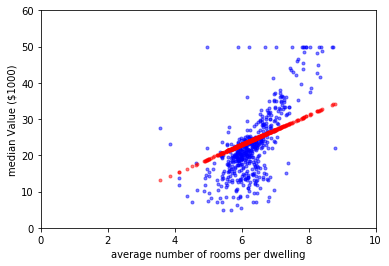

In [17]:
y_pred = lr.predict(X)

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('median Value ($1000)')

We only computed five iterations (default of `n_iter`). Increasing the iterations yields better results.

In [18]:
lr = lm.SGDRegressor(n_iter=10000)
lr.fit(X, y)
lr.score(X, y)

/Users/tir/.virtualenvs/mlpy/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.4794067976146952

Text(0,0.5,'median Value ($1000)')

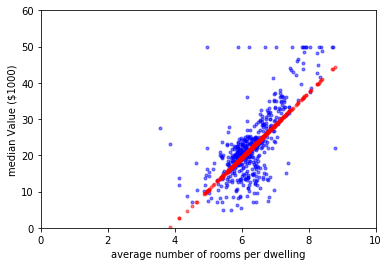

In [19]:
y_pred = lr.predict(X)

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('median Value ($1000)')

## Logistic Regression

As linear regression, logistic regression is a linear model.

A bit of intuition. We can start with a linear model.

Text(0,0.5,'y')

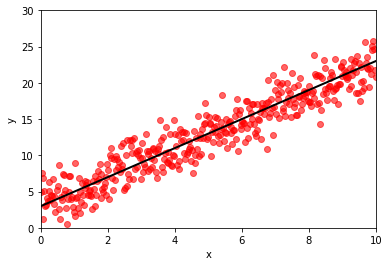

In [20]:
def line(a, b, x):
    return a * x + b

x = np.linspace(0, 10)
a, b = 2, 3
y = line(a, b, x)

size = 400
x_sample = np.linspace(0, 10, size)
y_sample = a * x_sample + b + np.random.normal(loc=0, scale=2, size=size)

plt.scatter(x_sample, y_sample, marker='o', alpha=0.6, c='r')
plt.plot(x, y, c='k', lw=2.)
plt.xlim(0, 10); plt.ylim(0, 30)
plt.xlabel('x'); plt.ylabel('y')

We generate sample of two different classes.

In [21]:
size = 1000
x_sample = np.linspace(0, 10, size)
x_class = np.linspace(0, 10, size)

y_class0 = np.array([r if r <= line(a, b, x) + 3 else -1 for x, r in zip(x_sample, 30 * np.random.uniform(size=size))])
y_class1 = np.array([r if r >= line(a, b, x) - 3 else -1 for x, r in zip(x_sample, 30 * np.random.uniform(size=size))])

In [22]:
y_class0.shape, y_class1.shape

((1000,), (1000,))

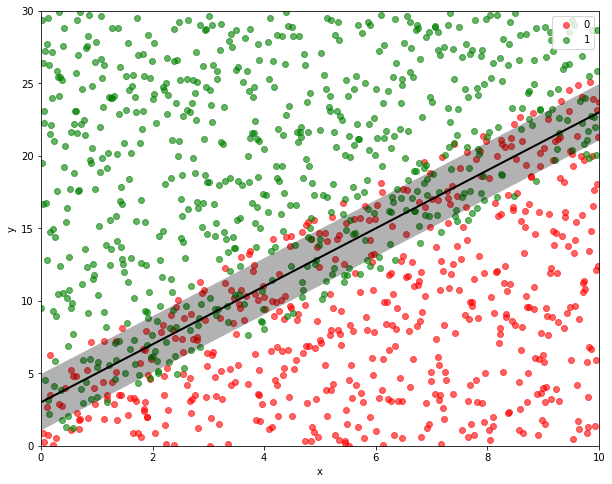

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(x_class[:len(y_class0)], y_class0, 	marker='o',alpha=0.6, c='r', label='0')
plt.scatter(x_class[:len(y_class1)], y_class1, 	marker='o',alpha=0.6, c='g', label='1')

plt.plot(x, y, c='k', linewidth=50., alpha=0.3)
plt.plot(x, y, c='k', linewidth=2.)

plt.xlim(0, 10)
plt.ylim(0, 30)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

The probability to encounter a green point in the lower right region is 0. Close to the line it green and red points mix, the upper left region contain green points only. The probability of a point of a given class follows an S-curve, the model can be derived from:

$$
log(\frac{P}{1-P}) = \sum_{j=0}^K b_j x_j
$$

## Logistic Regression on IRIS

In [24]:
logr = lm.LogisticRegression()

In [25]:
iris = datasets.load_iris()

In [26]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [27]:
logr.fit(X, y)
logr.score(X, y)

0.96

> Maybe exercise?

Calculating the scores and plotting for pairs of features.

In [28]:
for pair in [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]:
    X = iris.data[:, pair]
    y = iris.target

    logrfit = logr.fit(X, y)
    print(logr.score(X, y))

0.7666666666666667
0.9266666666666666
0.9066666666666666
0.9266666666666666
0.9466666666666667
0.8733333333333333


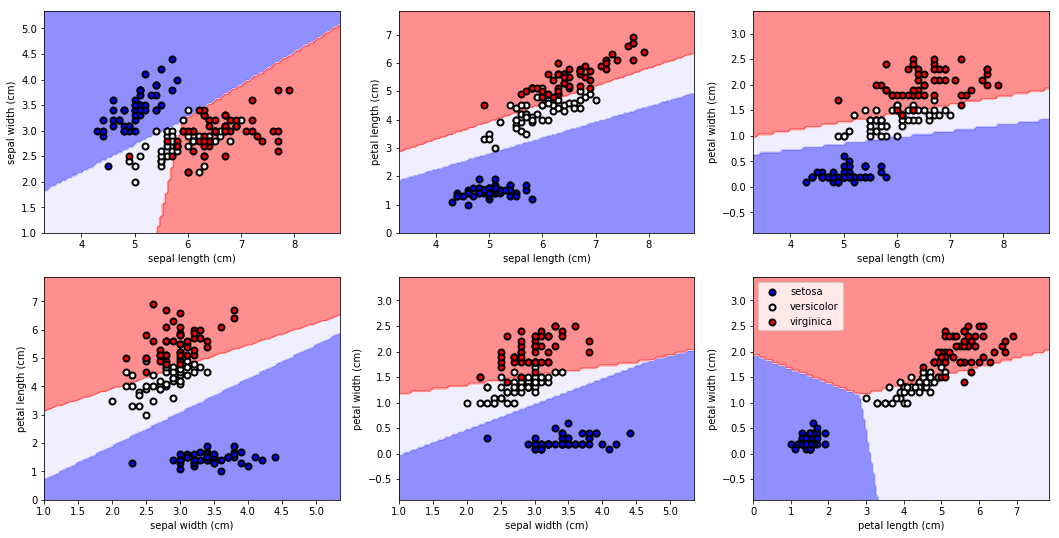

In [29]:
n_classes = 3
colors = 'bwr' # ['b','y','r']
CMAP = colors # plt.cm.rainbow
plot_step = 0.05

fig = plt.figure(1, figsize=(18, 9))

for i, pair in enumerate([[0, 1], [0, 2], [0, 3],
                          [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    logr = lm.LogisticRegression()
    clf = logr.fit(X, y)

    plt.subplot(2, 3, i + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for j, color in zip(range(n_classes), colors):
        idx = np.where(y == j)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=color, edgecolor='black',
                    lw=2, label=iris.target_names[j],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')

## Support Vector Machine

Support Vector Machines (SVM) are a popular machine learning model. It can work well with smaller datasets.

Logistic regression tried to minimize the classification uncertainty. In contrast an SVM will try to find the line of maximum margin between data points (support vectors) of different classes.

Sklearn uses libsvm, which uses a regularization parameter C. The bigger C, the higher the tolerance for misclassified  point at the boundary.

In [30]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X, y)
model.score(X, y)

0.9666666666666667

### Exercise: Plot the score for (X, y) for various values of C (0.1 to 100).

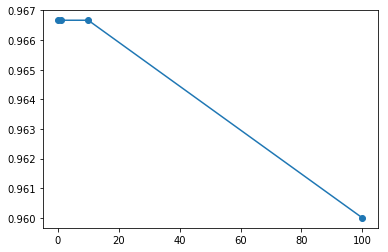

In [31]:
Cs = [0.1, 1, 10, 100]
svm_scores = []

for C in Cs:
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    svm_scores.append(model.score(X, y))

plt.plot(Cs, svm_scores, marker='o')

## Nonlinear SVM

To accomodate nonlinear data, SVM can transform th inputs into a feature space, where values is better suited for classification. The most common transformations functions are radial basis functions (RBF).

Using a simple data set first.

In [32]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

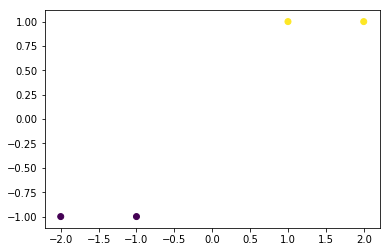

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [34]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
print(model.decision_function(X))
print(model.predict(X))

[-1.00052254 -1.00006594  1.00029424  1.00029424]
[1 1 2 2]


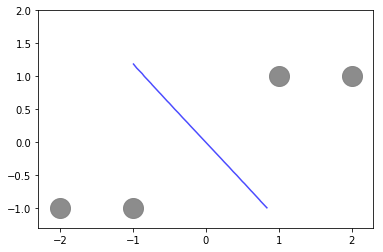

In [36]:
n_bins = 25
xg = np.linspace(-1, 2, n_bins)
yg = np.linspace(-1, 2, n_bins)

Xg, Yg = np.meshgrid(xg, yg)

xy = np.vstack([Xg.ravel(), Yg.ravel()]).T

P1 = model.decision_function(xy).reshape(Xg.shape)

cont = plt.contour(Xg, Yg, P1, colors='b',
                   levels=[0], alpha=0.7,
                   linestyles=['-'])

plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=400, 
            linewidth=1,
            facecolors='grey',
            alpha=0.9);

A more complex data set.

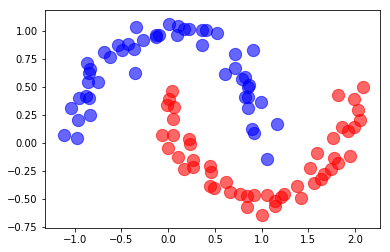

In [37]:
x = np.linspace(0, 10)
xlim = [0, 10]
ylim = [0, 30]

X, y = datasets.make_moons(100, noise=0.08, shuffle=True)

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, 	marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, 	marker='o',alpha=0.6, c='b')

Using RBF. The value of gamma controls the value of the function as it move further from its origin. The bigger gamma, the faster the value of the function decreases. The higher gamma, the more granular the approximation.


In [38]:
model = SVC(kernel='rbf', C=1E6, gamma=1.)
model.fit(X, y)
print(model.score(X,y))

1.0


The model exposes the list of support vectors.

In [39]:
model.support_vectors_

array([[-0.35852845,  0.62801179],
       [ 1.05988025, -0.14584784],
       [-0.97416804,  0.04660127],
       [ 0.36584753,  0.87472839],
       [ 1.59749287, -0.09191224],
       [ 0.04559572,  0.46367704],
       [ 0.9205561 , -0.46302347],
       [ 1.81855029,  0.42480445],
       [ 1.05519931, -0.46713004]])

In [40]:
model.decision_function([[20, 0]])

array([0.42130878])

In [41]:
model.decision_function([[0, 0.7]])

array([-0.16407535])

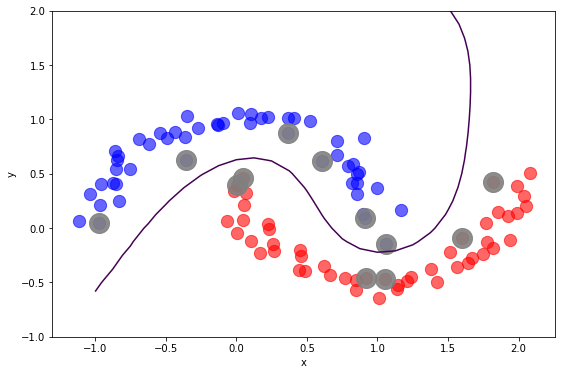

In [42]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(X[y==1][:,0], X[y==1][:,1], s=150, marker='o', alpha=0.6, c='r')
plt.scatter(X[y==0][:,0], X[y==0][:,1], s=150, marker='o', alpha=0.6, c='b')

plt.xlabel('x')
plt.ylabel('y')

# model
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10, gamma=1.)
model.fit(X, y)

# n_bins x n_bins data points
n_bins = 25

# prepare grid
xg = np.linspace(-1, 2, n_bins)
yg = np.linspace(-1, 2, n_bins)

# create a meshgrid
Xg, Yg = np.meshgrid(xg, yg)

# print(Yg.shape) # (25, 25)
# print(Xg.shape) # (25, 25)

# Flatten the X and Y coordinates and use the
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T

# print(xy.shape) # (625,2)

decf = model.decision_function(xy)
# print(decf.shape) # (625,)

P1 = model.decision_function(xy).reshape(Xg.shape)

cont = plt.contour(Xg, Yg, P1, levels=[0])

plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=400, # The marker size in points ** 2
            linewidth=1,
            facecolors='grey',
            alpha=0.9);

### Exercise

1. Experiment with parameters. Test and plot various parameters for gamma. Find example values of underfit and overfit.

1.0


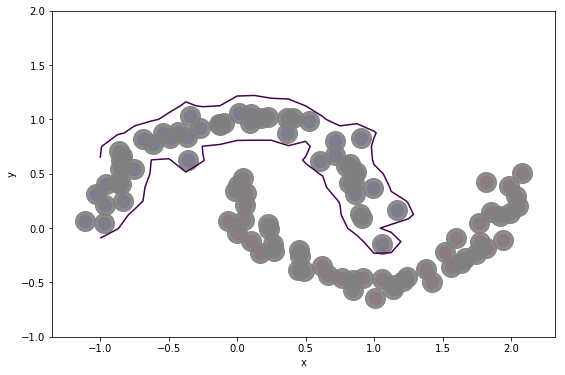

In [43]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(X[y==1][:,0], X[y==1][:,1], s=150, marker='o', alpha=0.6, c='r')
plt.scatter(X[y==0][:,0], X[y==0][:,1], s=150, marker='o', alpha=0.6, c='b')

plt.xlabel('x')
plt.ylabel('y')

# model
model = SVC(kernel='rbf', C=0.01, gamma=100)
model.fit(X, y)
print(model.score(X,y))

# n_bins x n_bins data points
n_bins = 25

# prepare grid
xg = np.linspace(-1, 2, n_bins)
yg = np.linspace(-1, 2, n_bins)

# create a meshgrid
Xg, Yg = np.meshgrid(xg, yg)

# print(Yg.shape) # (25, 25)
# print(Xg.shape) # (25, 25)

# Flatten the X and Y coordinates and use the
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T

# print(xy.shape) # (625,2)

decf = model.decision_function(xy)
# print(decf.shape) # (625,)

P1 = model.decision_function(xy).reshape(Xg.shape)

cont = plt.contour(Xg, Yg, P1, levels=[0])

plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=400, # The marker size in points ** 2
            linewidth=1,
            facecolors='grey',
            alpha=0.9);

### SVM and IRIS

Exercise:

1. Load the iris data set.
2. Run Support Vector classifier on the whole data set. Vary the kernel ('linear', 'rbf') and C (1, 1000).

In [44]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

model = SVC(kernel='linear', C=1, gamma=1)
model.fit(X, y)
print(model.score(X,y))

0.9933333333333333


In [45]:
model = SVC(kernel='rbf', C=1, gamma=1)
model.fit(X, y)
print(model.score(X,y))

0.98


In [46]:
model = SVC(kernel='rbf', C=1000, gamma=1)
model.fit(X, y)
print(model.score(X,y))

1.0


### Partial Exercise

1. Load the iris data set, and assign the features to X and the target to y.
2. Iterate over feature pairs.
3. Train an SVC in each loop.
4. Use a subplot (in a 2x3 order) for each plot.
5. Determine the min and max for both current features.
6. Create meshgrid with step size 0.1
7. Run predictions (predict) over the grid.
8. Draw a contour plot.
9. Add x and y labels.
10. Add a scatter plot of the data, using the right colors.

In [47]:
from sklearn.metrics import accuracy_score

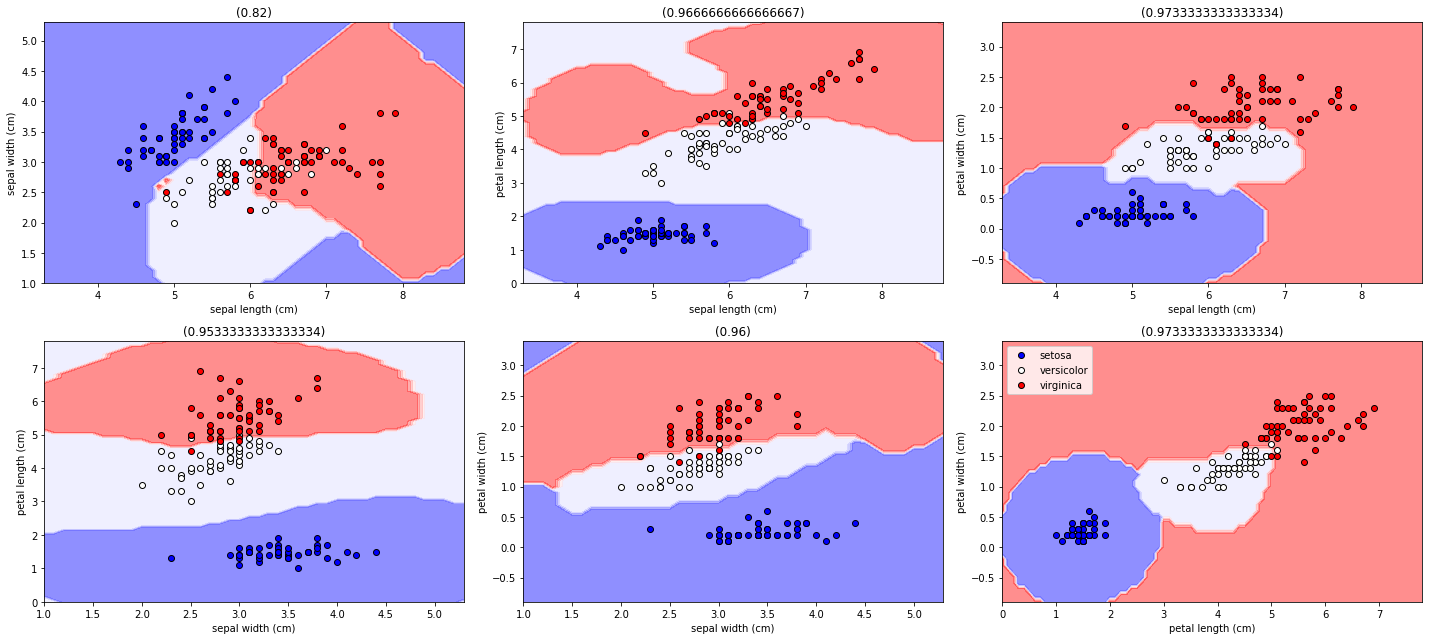

In [48]:
# (Partial) Solution
iris = datasets.load_iris()
X = iris.data
y = iris.target

n_classes = 3
colors = 'bwr'
CMAP = colors # plt.cm.rainbow
step = 0.1

fig = plt.figure(1, figsize=(20, 9))

for i, pair in enumerate([[0, 1], [0, 2], [0, 3],
                          [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    model = SVC(kernel='rbf', C=100, gamma=1)
    model.fit(X, y)

    plt.subplot(2, 3, i + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    # plt.axis("tight")

    for j, color in zip(range(n_classes), colors):
        idx = np.where(y == j)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=color, edgecolor='black', label=iris.target_names[j],
                    cmap=CMAP)
    
    plt.title("({})".format(accuracy_score(y, model.predict(X))))
    plt.axis("tight")
    plt.tight_layout()

plt.legend(loc='upper left')

## Decision Tree

Decision trees have a few advantages: they need less preprocessing (numerical and categorical data can be used side by side). However, they tend to overfit.

We use `make_blobs` to create a dataset.

Text(0,0.5,'y')

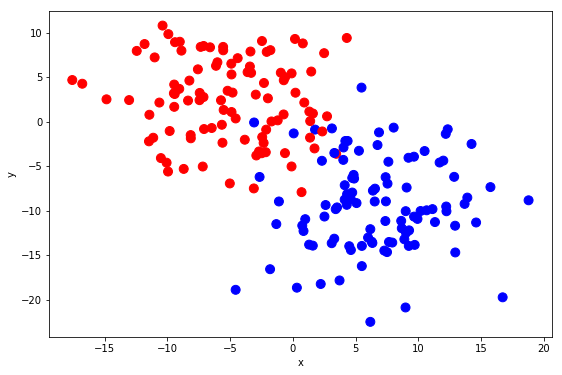

In [49]:
fig = plt.figure(1, figsize=(9, 6))

X, y = datasets.make_blobs(n_samples=200, centers=2, random_state=52, cluster_std=5.)
plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=CMAP)

plt.xlabel('x')
plt.ylabel('y')

The classifier can be imported from the `tree` subpackage.

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
print(tree.score(X,y))

1.0


The criterion 'gini' or 'entropy' is the method used to determined, where to split next. Both reflect the homogeneity of the resulting splits.

Text(0,0.5,'y')

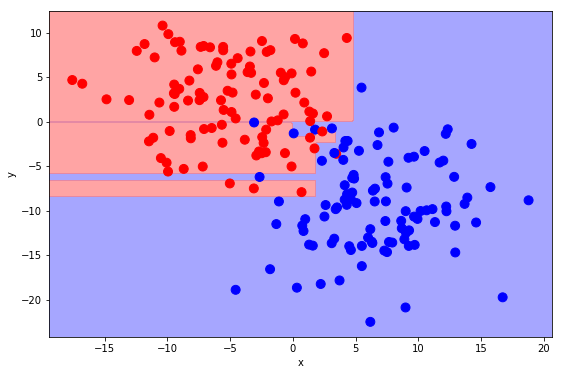

In [52]:
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()
    
ax.scatter(X[:, 0], X[:, 1], c=y, s=80,
           cmap=CMAP,
           clim=(y.min(), y.max()),
           zorder=3)

ax.axis('tight')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

In [53]:
from sklearn.tree import export_graphviz

External Graphviz required:
    
* https://www.graphviz.org/

```
$ dot -Tpng tree.dot > tree.png
```

In [54]:
# export_graphviz(tree, out_file='tree.dot')

![](tree.png)

Change a hyperparameter, using max_depth=1.

Text(0,0.5,'y')

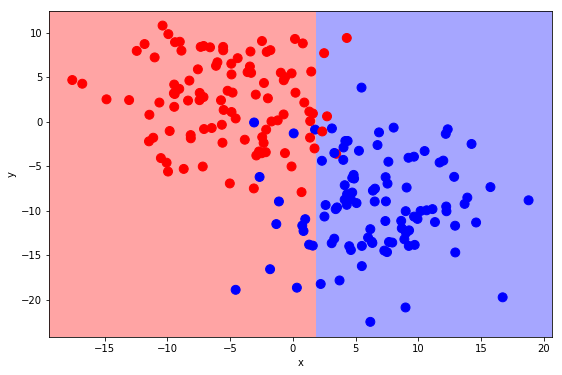

In [55]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X, y)

fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()
    
ax.scatter(X[:, 0], X[:, 1], c=y, s=80,
           cmap=CMAP,
           clim=(y.min(), y.max()),
           zorder=3)

ax.axis('tight')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

In [56]:
# export_graphviz(tree, out_file='tree2.dot')

![](tree2.png)

Increasing the max_depth to 2, 3, 4, 5.

Text(0,0.5,'y')

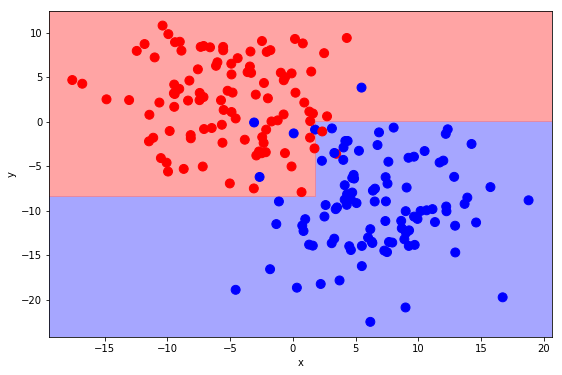

In [57]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()
    
ax.scatter(X[:, 0], X[:, 1], c=y, s=80,
           cmap=CMAP,
           clim=(y.min(), y.max()),
           zorder=3)

ax.axis('tight')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

Counteract overfitting with min_samples_split.

0.98


Text(0,0.5,'y')

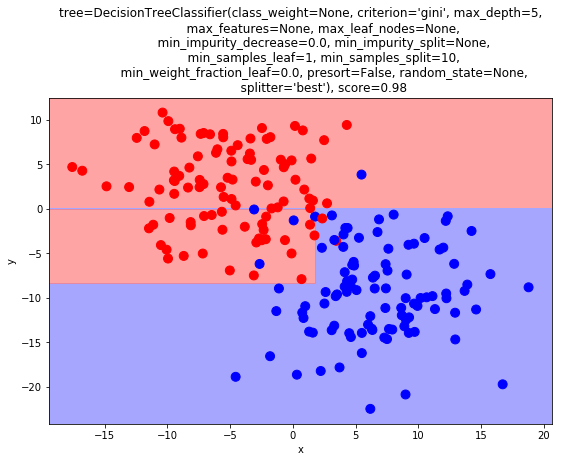

In [58]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
tree.fit(X, y)
print(tree.score(X, y))

fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()
    
ax.scatter(X[:, 0], X[:, 1], c=y, s=80,
           cmap=CMAP,
           clim=(y.min(), y.max()),
           zorder=3)

ax.axis('tight')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.title("tree=%s, score=%s" % (tree, tree.score(X, y)))
plt.xlabel('x')
plt.ylabel('y')

In [59]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, max_leaf_nodes=8)
tree.fit(X, y)
print(tree.score(X, y))

0.975


Tuning four parameters.

In [60]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=1, max_leaf_nodes=8)
tree.fit(X, y)
print(tree.score(X, y))

0.975


## Random Forests

Random forests train many decision trees on subsets of the data and then use the average or a majority vote for prediction. First we regenerate some sample data.

Text(0,0.5,'y')

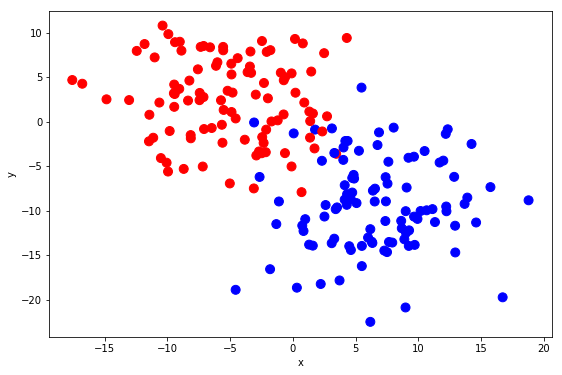

In [61]:
fig = plt.figure(1, figsize=(9, 6))

X, y = datasets.make_blobs(n_samples=200, centers=2, random_state=52, cluster_std=5.)
plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=CMAP)

plt.xlabel('x')
plt.ylabel('y')

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier()

In [64]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
print(rf.score(X, y))

0.995


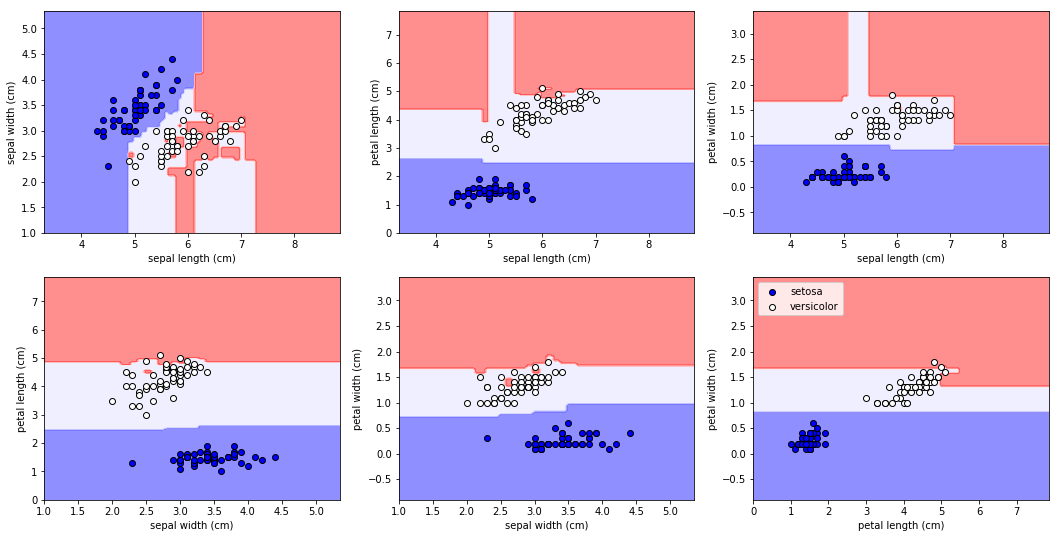

In [67]:
fig = plt.figure(1, figsize=(18, 9))

for i, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = rf.fit(X, y)

    plt.subplot(2, 3, i + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for j, color in zip(range(n_classes), colors):
        idx = np.where(y == j)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black',
                    label=iris.target_names[j],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')
plt.show()

### Boosted Decision Tree

The random forest tries to use a number of good decision trees into better classifier. Boosting tries to learn many weak classifiers and then combine them to create a stronger classifier.

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
clf = AdaBoostClassifier()
clf.fit(X, y)
print(clf.score(X, y))

0.96


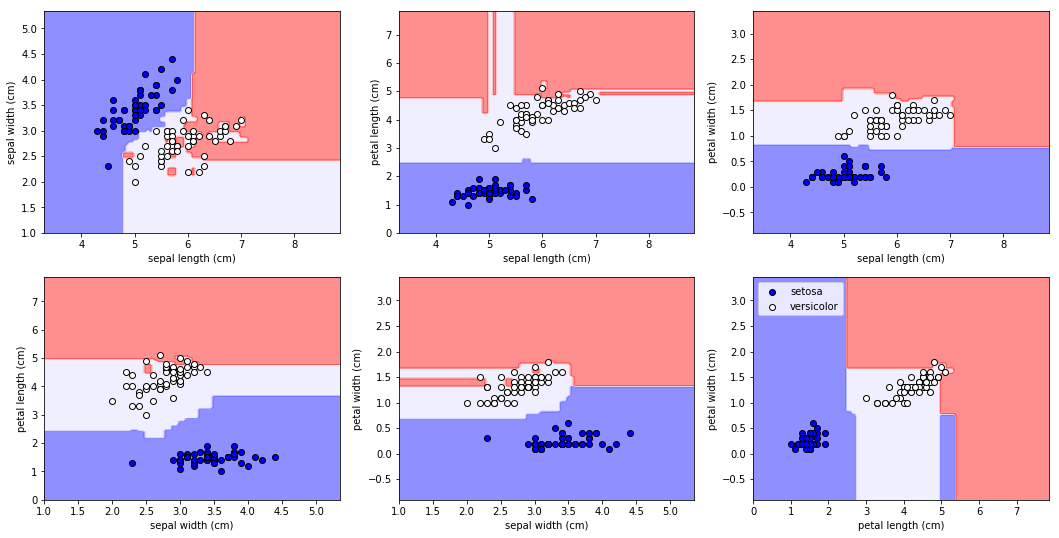

In [70]:
fig = plt.figure(1, figsize=(18, 9))

for i, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = rf.fit(X, y)

    plt.subplot(2, 3, i + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for j, color in zip(range(n_classes), colors):
        idx = np.where(y == j)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black',
                    label=iris.target_names[j],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')
plt.show()